In [49]:
import os
import sys
import csv                                                      
import networkx as nx
from operator import itemgetter
import community
import matplotlib.pyplot as plt
import numpy as np

In [50]:
module_path = os.path.abspath(os.path.join('..'))
src_path = '{}/src'.format(module_path)
if module_path not in sys.path:
    sys.path.append(src_path)

c_elegans_undir_names_path = '{}/data/c_elegans_undir_names.txt'.format(module_path)
c_elegans_undir_path = '{}/data/c_elegans_undir.net'.format(module_path)

Leitura do arquivo c_elegans_undir_names

In [51]:
with open(c_elegans_undir_names_path, 'r') as celenamenet:
    nodereader = celenamenet.read()
    nodes = { n.split(' ')[0]: n.split(' ')[1] for n in nodereader.split('\n')[:-1] }
    node_names = [ nodes[n] for n in nodes ]
    print(nodes)

{'0': 'ADAL', '1': 'ADAR', '2': 'ADEL', '3': 'ADER', '4': 'ADFL', '5': 'ADFR', '6': 'ADLL', '7': 'ADLR', '8': 'AFDL', '9': 'AFDR', '10': 'AIAL', '11': 'AIAR', '12': 'AIBL', '13': 'AIBR', '14': 'AIML', '15': 'AIMR', '16': 'AINL', '17': 'AINR', '18': 'AIYL', '19': 'AIYR', '20': 'AIZL', '21': 'AIZR', '22': 'ALA', '23': 'ALML', '24': 'ALMR', '25': 'ALNL', '26': 'ALNR', '27': 'AQR', '28': 'AS01', '29': 'AS10', '30': 'AS11', '31': 'AS02', '32': 'AS03', '33': 'AS04', '34': 'AS05', '35': 'AS06', '36': 'AS07', '37': 'AS08', '38': 'AS09', '39': 'ASEL', '40': 'ASER', '41': 'ASGL', '42': 'ASGR', '43': 'ASHL', '44': 'ASHR', '45': 'ASIL', '46': 'ASIR', '47': 'ASJL', '48': 'ASJR', '49': 'ASKL', '50': 'ASKR', '51': 'AUAL', '52': 'AUAR', '53': 'AVAL', '54': 'AVAR', '55': 'AVBL', '56': 'AVBR', '57': 'AVDL', '58': 'AVDR', '59': 'AVEL', '60': 'AVER', '61': 'AVFL', '62': 'AVFR', '63': 'AVG', '64': 'AVHL', '65': 'AVHR', '66': 'AVJL', '67': 'AVJR', '68': 'AVKL', '69': 'AVKR', '70': 'AVL', '71': 'AVM', '72': 

Leitura do arquivo c_elegans_undir

In [52]:
with open(c_elegans_undir_path, 'r') as celenet:
    edgereader = celenet.read()
    edges = [tuple([nodes[v] for v in n.split(' ')]) for n in edgereader.split('\n')[:-1]]
    print(edges)

[('ADAL', 'ADAR'), ('ADAL', 'ADEL'), ('ADAL', 'ADFL'), ('ADAL', 'AIAL'), ('ADAL', 'AIBL'), ('ADAL', 'AIBR'), ('ADAL', 'ASHL'), ('ADAL', 'AVAR'), ('ADAL', 'AVBL'), ('ADAL', 'AVBR'), ('ADAL', 'AVDL'), ('ADAL', 'AVDR'), ('ADAL', 'AVEL'), ('ADAL', 'AVJR'), ('ADAL', 'AWAL'), ('ADAL', 'FLPR'), ('ADAL', 'PVPL'), ('ADAL', 'PVQL'), ('ADAL', 'PVR'), ('ADAL', 'RICL'), ('ADAL', 'RICR'), ('ADAL', 'RIML'), ('ADAL', 'RIPL'), ('ADAL', 'RMGL'), ('ADAL', 'SMDVR'), ('ADAR', 'ADER'), ('ADAR', 'ADFR'), ('ADAR', 'AIAR'), ('ADAR', 'AIBL'), ('ADAR', 'AIBR'), ('ADAR', 'ASHR'), ('ADAR', 'AVAL'), ('ADAR', 'AVBL'), ('ADAR', 'AVBR'), ('ADAR', 'AVDL'), ('ADAR', 'AVEL'), ('ADAR', 'AVJL'), ('ADAR', 'PVQR'), ('ADAR', 'RICL'), ('ADAR', 'RICR'), ('ADAR', 'RIMR'), ('ADAR', 'RIPR'), ('ADAR', 'RIVR'), ('ADAR', 'RMGR'), ('ADAR', 'SMDVL'), ('ADAR', 'URBR'), ('ADEL', 'ADER'), ('ADEL', 'AINL'), ('ADEL', 'ALA'), ('ADEL', 'AVAL'), ('ADEL', 'AVAR'), ('ADEL', 'AVEL'), ('ADEL', 'AVKR'), ('ADEL', 'AVL'), ('ADEL', 'BDUL'), ('ADEL', '

Imprime a quantidade de cada um

In [53]:
print(len(node_names))  
print(len(edges))                                                                               

G = nx.Graph() # inicializando o grafo                                                   
G.add_nodes_from(node_names) # cria os nós                           
G.add_edges_from(edges) # adiciona as arestas no grafo  
print(nx.info(G)) # imprime informações do grafo (resumo)

density = nx.density(G)
print('Densidade da rede: ', density)

#fell_whitehead_path = nx.shortest_path(G, source='ADAL',target='AIYL')
#print('Menor caminho entre Fell e Whitehead: ', fell_whitehead_path)

279
2287
Name: 
Type: Graph
Number of nodes: 279
Number of edges: 2287
Average degree:  16.3943
Densidade da rede:  0.05897217709703205


Grafo é conexo?

In [54]:
print(nx.is_connected(G))

True


Obtém os componentes do grafo

In [55]:
components = nx.connected_components(G)
print(components)

<generator object connected_components at 0x7f6966419318>


Obtém o maior componente

In [56]:
largest_component = max(components, key=len)
print(largest_component)

{'AVG', 'HSNR', 'ADLL', 'IL1VL', 'IL1DR', 'SAAVR', 'SAAVL', 'VD05', 'VA05', 'RIBL', 'IL1R', 'ASEL', 'URYDL', 'AVDR', 'AIAR', 'SIBVR', 'OLQVL', 'PLML', 'DA02', 'PQR', 'AVL', 'ASJL', 'AS06', 'SMDVL', 'PVCL', 'BAGR', 'IL2DL', 'AVBL', 'DA06', 'ASGL', 'VA03', 'RIAR', 'URAVR', 'DD06', 'SIAVR', 'DA08', 'SMBDR', 'VC05', 'AQR', 'AWAR', 'DA09', 'DB02', 'ADFL', 'PDA', 'RICL', 'RMED', 'VD09', 'DB05', 'PVDL', 'RIFL', 'URBL', 'ALML', 'VD13', 'AVKL', 'PVPL', 'RIFR', 'RMDDL', 'VC01', 'URXL', 'VA11', 'DB01', 'AVJL', 'VB09', 'BAGL', 'RMFR', 'CEPDL', 'PHBL', 'RMHL', 'RIBR', 'AS07', 'SMBDL', 'OLQVR', 'PHCL', 'VD07', 'SIADL', 'PLMR', 'IL1VR', 'AUAL', 'AVHR', 'PHBR', 'AS09', 'VD03', 'PHAL', 'SIBVL', 'VA07', 'PVQR', 'DVC', 'PVPR', 'AFDL', 'AVDL', 'AIMR', 'URADL', 'ALMR', 'PVQL', 'PDEL', 'SIADR', 'OLQDL', 'AS01', 'AVBR', 'DA04', 'AINR', 'PLNL', 'SMDDL', 'AVHL', 'AS02', 'LUAL', 'FLPL', 'RMER', 'AVAL', 'ADEL', 'ALA', 'ASGR', 'SMBVL', 'DD02', 'VB05', 'CEPDR', 'SAADR', 'AVER', 'DB04', 'AVAR', 'DA07', 'DD03', 'RID

Diâmetro do maior componente

In [57]:
subgraph = G.subgraph(largest_component)
diameter = nx.diameter(subgraph)
print('Diâmetro do maior componente: ', diameter)

Diâmetro do maior componente:  5


Obtém o grau dos nós

In [58]:
degree_dict = dict(G.degree(G.nodes()))
print(degree_dict)
#nx.set_node_attributes(G, degree_dict, 'degree')
#print(G.node['William Penn'])

{'ADAL': 25, 'ADAR': 22, 'ADEL': 29, 'ADER': 24, 'ADFL': 10, 'ADFR': 18, 'ADLL': 21, 'ADLR': 17, 'AFDL': 6, 'AFDR': 8, 'AIAL': 21, 'AIAR': 17, 'AIBL': 34, 'AIBR': 39, 'AIML': 17, 'AIMR': 13, 'AINL': 9, 'AINR': 13, 'AIYL': 15, 'AIYR': 14, 'AIZL': 24, 'AIZR': 24, 'ALA': 8, 'ALML': 14, 'ALMR': 7, 'ALNL': 5, 'ALNR': 8, 'AQR': 21, 'AS01': 12, 'AS10': 6, 'AS11': 7, 'AS02': 10, 'AS03': 12, 'AS04': 9, 'AS05': 12, 'AS06': 9, 'AS07': 4, 'AS08': 2, 'AS09': 4, 'ASEL': 15, 'ASER': 16, 'ASGL': 7, 'ASGR': 9, 'ASHL': 20, 'ASHR': 22, 'ASIL': 10, 'ASIR': 8, 'ASJL': 6, 'ASJR': 6, 'ASKL': 12, 'ASKR': 10, 'AUAL': 13, 'AUAR': 14, 'AVAL': 92, 'AVAR': 93, 'AVBL': 75, 'AVBR': 74, 'AVDL': 44, 'AVDR': 55, 'AVEL': 55, 'AVER': 56, 'AVFL': 22, 'AVFR': 19, 'AVG': 22, 'AVHL': 24, 'AVHR': 22, 'AVJL': 31, 'AVJR': 29, 'AVKL': 34, 'AVKR': 24, 'AVL': 27, 'AVM': 19, 'AWAL': 9, 'AWAR': 15, 'AWBL': 13, 'AWBR': 15, 'AWCL': 12, 'AWCR': 12, 'BAGL': 13, 'BAGR': 12, 'BDUL': 11, 'BDUR': 13, 'CEPDL': 20, 'CEPDR': 24, 'CEPVL': 16, '

Ontem apenas o grau do nó

[25, 22, 29, 24, 10, 18, 21, 17, 6, 8, 21, 17, 34, 39, 17, 13, 9, 13, 15, 14, 24, 24, 8, 14, 7, 5, 8, 21, 12, 6, 7, 10, 12, 9, 12, 9, 4, 2, 4, 15, 16, 7, 9, 20, 22, 10, 8, 6, 6, 12, 10, 13, 14, 92, 93, 75, 74, 44, 55, 55, 56, 22, 19, 22, 24, 22, 31, 29, 34, 24, 27, 19, 9, 15, 13, 15, 12, 12, 13, 12, 11, 13, 20, 24, 16, 19, 14, 16, 14, 12, 13, 8, 2, 10, 13, 16, 13, 19, 14, 7, 7, 7, 21, 20, 14, 8, 6, 8, 50, 10, 27, 15, 16, 24, 33, 13, 10, 12, 18, 11, 12, 8, 9, 14, 13, 11, 11, 12, 11, 18, 21, 13, 15, 15, 15, 6, 3, 10, 12, 10, 9, 9, 13, 9, 7, 4, 14, 2, 2, 9, 54, 53, 7, 7, 8, 24, 26, 23, 25, 14, 24, 30, 28, 10, 6, 33, 36, 38, 34, 25, 24, 18, 15, 19, 33, 25, 32, 29, 31, 17, 16, 22, 28, 12, 16, 21, 19, 23, 22, 20, 24, 10, 11, 16, 20, 14, 9, 28, 23, 9, 10, 13, 16, 12, 10, 14, 10, 9, 11, 13, 5, 4, 6, 6, 3, 7, 10, 9, 14, 17, 10, 11, 17, 22, 18, 16, 7, 9, 6, 7, 12, 14, 13, 17, 11, 10, 13, 13, 8, 3, 10, 21, 13, 14, 12, 9, 8, 8, 13, 16, 20, 10, 8, 15, 7, 10, 8, 11, 6, 10, 11, 15, 18, 22, 6, 9, 18, 

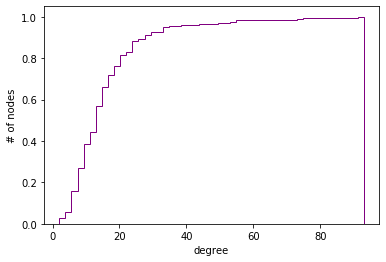

<Figure size 432x288 with 0 Axes>

In [59]:
values = list()
for key in degree_dict.keys():
    values.append(degree_dict[key])

print(values)
'''
plt.hist(values, bins=15)
plt.ylabel('# of nodes')
plt.xlabel('degree')
plt.show()
plt.savefig('degree_distribution.png')
'''
plt.hist(values, bins=50, density=1,
cumulative=True, label='CDF DATA',
histtype='step', color='purple')
plt.ylabel('# of nodes')
plt.xlabel('degree')
plt.show()
plt.savefig('degree_cdf.png')